In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/MUSCULOSKELETAL HEALTH - Sheet1.csv')
df2=pd.read_csv('/content/drive/MyDrive/Test_data_version1.xlsx - Sheet1.csv')


df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,KHAIGHGPTTL155,5.712342e+08,3.739306e+07,1.152345e+09
1,KHAIGHGPTTL156,1.251631e+09,9.220119e+04,8.085465e+08
2,KHAIGHGPTTL157,6.028514e+08,2.764356e+05,9.785774e+08
3,KHAIGHGPTTL158,9.028730e+08,1.843184e+05,8.086463e+08
4,KHAIGHGPTTL159,6.047848e+08,2.763516e+05,1.175862e+09
...,...,...,...,...
2145,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09
2146,KHYUNQGPTTL10,1.851188e+08,0.000000e+00,3.647334e+08
2147,KHYUNQGPTTL11,1.831921e+08,4.610059e+04,6.262528e+08
2148,KHAIGPRX1340,1.504679e+06,0.000000e+00,2.499629e+08


In [ ]:
df2

,Patient_ID,Diabetes,High Blood pressure,Coronary Artery Disease,Arrhythmia,"Heart Failure- Dilated Cardiomyopathy, Restrictive Cardiomyopathy",Cholesterol disorders,Hypertriglyceridemia,"Thyroid Disorders- Hypothyroidism, Hyperthyroidism","Anemia- Microcytic, Hemolytic",...,Fatigue,"Mood Disorders- Anxiety, Schizophrenia, Depression",Urticaria,Essential tremors,Renal Disorders,"Sinusitis, Dust Allergy (Ciliary dykinesia, Hyper IgE syndrome, Angioedma, Chroinc granulomatous)",Obesity,Skin Health,Eye Health,Gastritis
0,KHAIGHGPPGX19,Moderate to High,Mild,-,-,-,Mild,Moderate,0,0,...,-,0,-,-,-,-,Mild,-,-,Mild
1,KHAIGHGPPGX22,Mild,Moderate,Mild,-,-,Moderate,Mild,Mild,0,...,-,0,-,-,-,-,Mild,-,-,Mild
2,KHAIGHGPTTL318,Mild to Moderate,Mild,Mild,-,-,Mild,Mild,Low to Mild,0,...,-,0,-,-,-,-,Low to Mild,-,-,Moderate
3,KHAIGHGPTTL319,Mild to Moderate,Mild to Moderate,Mild,-,-,Moderate,Moderate,Low to Mild,0,...,-,0,-,-,-,-,Moderate,-,-,Moderate
4,KHAIGHGPTTL321,Moderate to High,Mild,Mild,-,-,Mild to Moderate,Mild to Moderate,Low to Mild,0,...,-,0,-,-,-,-,Mild to Moderate,-,-,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KHAIGHGPTTL546,Mild,Mild,Mild,-,-,Mild,Moderate,0,0,...,-,Moderate,-,-,-,-,0,-,Mild,-
496,KHAIGHGPTTL548,Low,Moderate to High,Mild,-,-,Moderate,Mild,0,0,...,-,Moderate,-,-,-,-,Moderate,-,-,0
497,KHAIGHGPTTL551,Moderate,Mild,Mild,-,-,Moderate,Moderate,Mild,0,...,-,Moderate,-,-,-,-,Mild,-,-,Moderate
498,KHAIGHGPTTL553,Mild,Mild,Mild,-,-,Mild,Mild,Low,0,...,-,Moderate,-,-,-,-,Mild,-,-,Low to Mild


In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set2.csv')

In [ ]:
labels['new_labels'].value_counts()

,count
new_labels,
1,2022
0,120
2,8


# EXTRA TREES

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
df_train_set2

,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,new_labels
0,5.712342e+08,3.739306e+07,1.152345e+09,1
1,1.251631e+09,9.220119e+04,8.085465e+08,1
2,6.028514e+08,2.764356e+05,9.785774e+08,1
3,9.028730e+08,1.843184e+05,8.086463e+08,1
4,6.047848e+08,2.763516e+05,1.175862e+09,1
...,...,...,...,...
1678,4.270590e+08,3.685527e+05,1.337207e+09,1
1679,2.422735e+08,1.885776e+07,8.768683e+08,1
1680,1.851188e+08,0.000000e+00,3.647334e+08,1
1681,1.504679e+06,0.000000e+00,2.499629e+08,1


In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.3

In [ ]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
y_train.value_counts()

,count
new_labels,
1,1120
2,1120
0,1120


In [ ]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Extra Trees Classifier Metrics:
Accuracy: 0.9979166666666667
Precision: 0.9979181043899206
Recall: 0.9979166666666667
F1-score: 0.9979166644061029
Confusion Matrix:
[[479   1   0]
 [  2 478   0]
 [  0   0 480]]


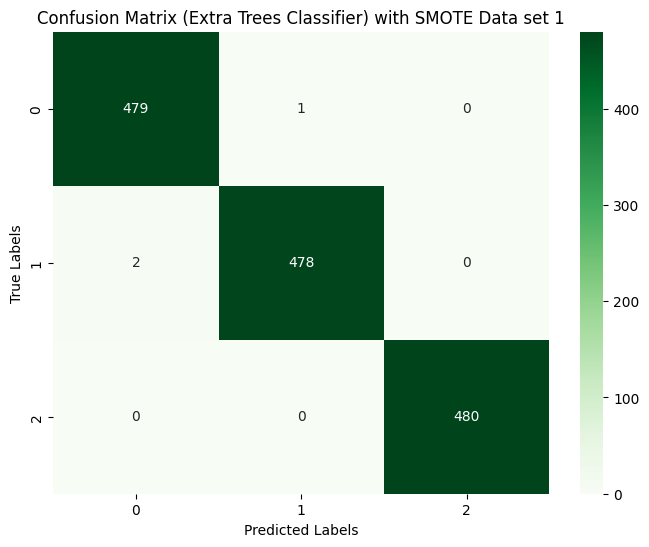

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(
    n_estimators=50,
    max_depth=30,
    min_samples_split=2,
    random_state=42
)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

# Evaluate the Extra Trees model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Print the evaluation metrics
print("Extra Trees Classifier Metrics:")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"F1-score: {f1_et}")
print(f"Confusion Matrix:\n{conf_matrix_et}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Extra Trees Classifier) with SMOTE Data set 1")
plt.show()

Accuracy (Extra Trees): 0.9982174688057041
Precision (Extra Trees): 0.9982315893363238
Recall (Extra Trees): 0.9982174688057041
F1-score (Extra Trees): 0.9982226580852391
Confusion Matrix (Extra Trees):
[[  80    1    0]
 [   2 1598    0]
 [   0    0    2]]


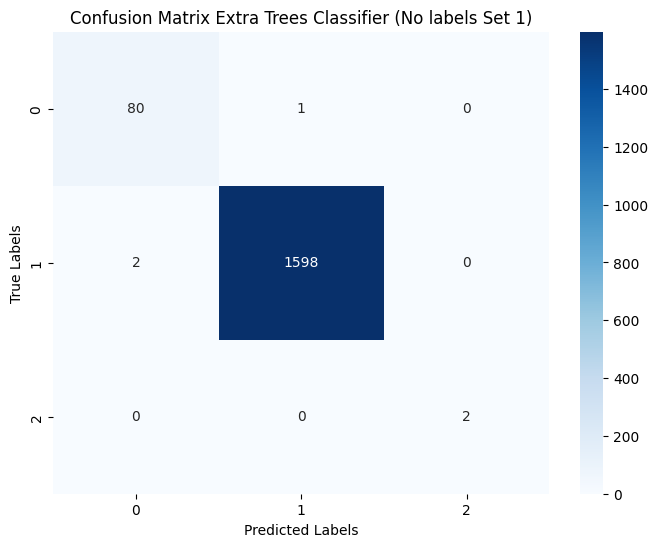

In [ ]:
y_pred_train_et = et_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_train_valid, y_pred_train_et)
precision_et = precision_score(y_train_valid, y_pred_train_et, average='weighted')  # Use 'weighted' for multi-class
recall_et = recall_score(y_train_valid, y_pred_train_et, average='weighted')
f1_et = f1_score(y_train_valid, y_pred_train_et, average='weighted')
conf_matrix_et = confusion_matrix(y_train_valid, y_pred_train_et)

# Print metrics
print(f"Accuracy (Extra Trees): {accuracy_et}")
print(f"Precision (Extra Trees): {precision_et}")
print(f"Recall (Extra Trees): {recall_et}")
print(f"F1-score (Extra Trees): {f1_et}")
print(f"Confusion Matrix (Extra Trees):\n{conf_matrix_et}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier (No labels Set 1)")
plt.show()


Accuracy (Extra Trees Test): 0.9207708779443254
Precision (Extra Trees Test): 0.9153052514936884
Recall (Extra Trees Test): 0.9207708779443254
F1-score (Extra Trees Test): 0.8992514108380687
Confusion Matrix (Extra Trees Test):
[[  9  30   0]
 [  2 420   0]
 [  0   5   1]]


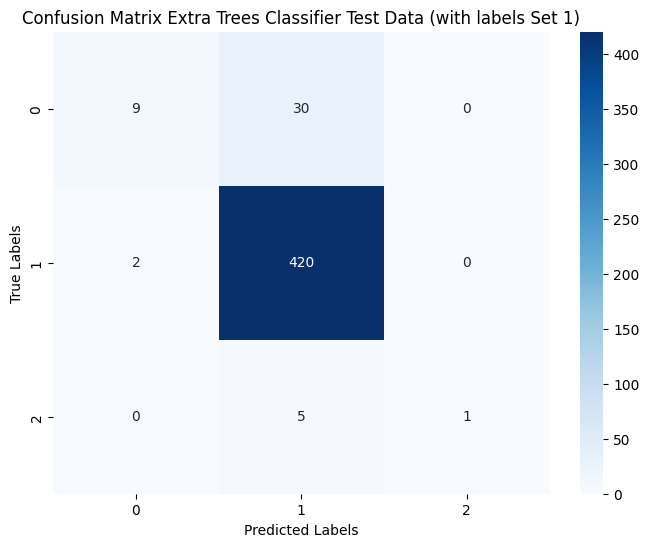

In [ ]:
# Predict on test data
y_pred_test_et = et_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_et_test = accuracy_score(y_test_valid, y_pred_test_et)
precision_et_test = precision_score(y_test_valid, y_pred_test_et, average='weighted')  # Use 'weighted' for multi-class
recall_et_test = recall_score(y_test_valid, y_pred_test_et, average='weighted')
f1_et_test = f1_score(y_test_valid, y_pred_test_et, average='weighted')
conf_matrix_et_test = confusion_matrix(y_test_valid, y_pred_test_et)

# Print metrics
print(f"Accuracy (Extra Trees Test): {accuracy_et_test}")
print(f"Precision (Extra Trees Test): {precision_et_test}")
print(f"Recall (Extra Trees Test): {recall_et_test}")
print(f"F1-score (Extra Trees Test): {f1_et_test}")
print(f"Confusion Matrix (Extra Trees Test):\n{conf_matrix_et_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier Test Data (with labels Set 1)")
plt.show()


In [ ]:
y_pred_test_et

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09
...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09


In [ ]:
# Merge df2 with total_test_org based on 'Patient_ID'
merged_df = df_test.merge(df2[['Patient_ID', 'Muscular dystrophy, atrophy']], on='Patient_ID', how='left')
# Changed 'patient_id' to 'Patient_ID' to match the column name in df2 and total_test_org

# 'merged_df' now contains all columns from total_test_org and an additional 'GALL_BLADDER_DISORDERS' column

In [ ]:
merged_df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy"
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-
...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate


In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set2.csv')

In [ ]:
# Select the required columns from the labels dataset
new_labels_df = labels[['Patient_ID', 'new_labels']]

# Merge the new_labels column with merge_df on patient_id
final_merged_df = merged_df.merge(new_labels_df, on='Patient_ID', how='inner')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  
0            Mild to Moderate           1  
1                           -           1  
2                           0           1  
3                        Mild           0  
4                           -           1  


In [ ]:
merged_df

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy"
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-
...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate


In [ ]:
import pandas as pd

# Convert the array into a DataFrame
y_pred_test_et_df = pd.DataFrame({
    'predicted_labels_et': y_pred_test_et  # Array of predictions
})

# Reset the index of both DataFrames to align the rows
final_merged_df = final_merged_df.reset_index(drop=True)
y_pred_test_et_df = y_pred_test_et_df.reset_index(drop=True)

# Concatenate the DataFrame with the predictions
final_merged_EXTRA_TREES_set2= pd.concat([final_merged_df, y_pred_test_et_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_EXTRA_TREES_set2.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  predicted_labels_et  
0            Mild to Moderate           1                    1  
1                           -           1                    1  
2                           0           1                    1  
3                        Mild           0                    0  
4                           -           1                    1  


In [ ]:
final_merged_EXTRA_TREES_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,predicted_labels_et
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1,1
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1,1


In [ ]:
final_merged_EXTRA_TREES_set2.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_EXTRA_TREES_musculoskeletal_set2.csv', index=False)


# LIGHTGBM

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set2.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 3840, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

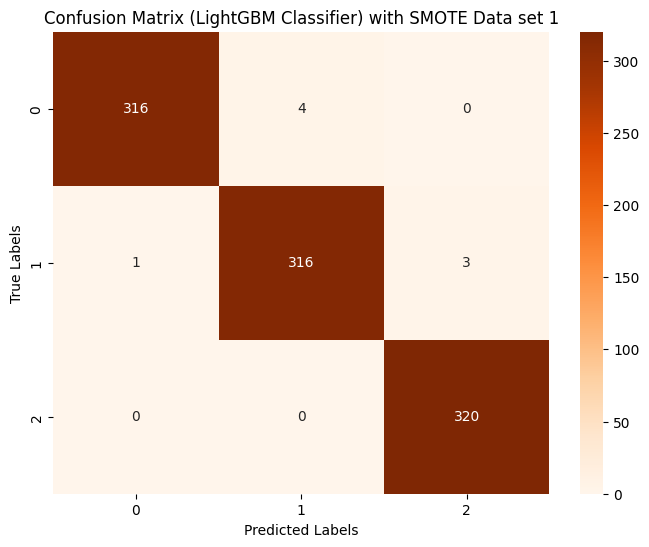

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# LightGBM Classifier
lgbm_classifier = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=5,
    random_state=42
)

# Train the classifier
lgbm_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_lgbm = lgbm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Print the evaluation metrics
print("LightGBM Classifier Metrics:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-score: {f1_lgbm}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (LightGBM Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (LightGBM): 0.995840760546643
Precision (LightGBM): 0.9968941220271513
Recall (LightGBM): 0.995840760546643
F1-score (LightGBM): 0.996207227005914
Confusion Matrix (LightGBM):
[[  78    3    0]
 [   1 1596    3]
 [   0    0    2]]


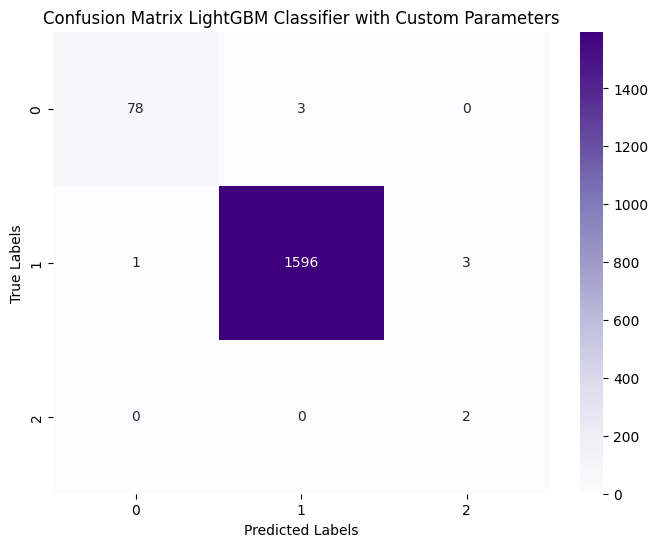

In [ ]:
y_pred_train_lgbm = lgbm_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_train_valid, y_pred_train_lgbm)
precision_lgbm = precision_score(y_train_valid, y_pred_train_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm = recall_score(y_train_valid, y_pred_train_lgbm, average='weighted')
f1_lgbm = f1_score(y_train_valid, y_pred_train_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_train_valid, y_pred_train_lgbm)

# Print metrics
print(f"Accuracy (LightGBM): {accuracy_lgbm}")
print(f"Precision (LightGBM): {precision_lgbm}")
print(f"Recall (LightGBM): {recall_lgbm}")
print(f"F1-score (LightGBM): {f1_lgbm}")
print(f"Confusion Matrix (LightGBM):\n{conf_matrix_lgbm}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier with Custom Parameters")
plt.show()


Accuracy (LightGBM Test): 0.9100642398286938
Precision (LightGBM Test): 0.8855519866761837
Recall (LightGBM Test): 0.9100642398286938
F1-score (LightGBM Test): 0.8904842186475882
Confusion Matrix (LightGBM Test):
[[ 10  29   0]
 [  6 415   1]
 [  0   6   0]]


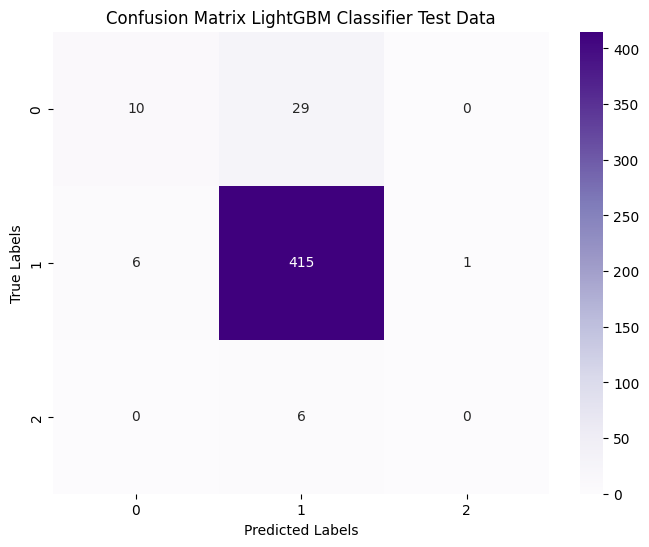

In [ ]:
# # Predict on test data
y_pred_test_lgbm = lgbm_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_lgbm_test = accuracy_score(y_test_valid, y_pred_test_lgbm)
precision_lgbm_test = precision_score(y_test_valid, y_pred_test_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm_test = recall_score(y_test_valid, y_pred_test_lgbm, average='weighted')
f1_lgbm_test = f1_score(y_test_valid, y_pred_test_lgbm, average='weighted')
conf_matrix_lgbm_test = confusion_matrix(y_test_valid, y_pred_test_lgbm)

# Print metrics
print(f"Accuracy (LightGBM Test): {accuracy_lgbm_test}")
print(f"Precision (LightGBM Test): {precision_lgbm_test}")
print(f"Recall (LightGBM Test): {recall_lgbm_test}")
print(f"F1-score (LightGBM Test): {f1_lgbm_test}")
print(f"Confusion Matrix (LightGBM Test):\n{conf_matrix_lgbm_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier Test Data")
plt.show()


In [ ]:
y_pred_test_lgbm

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
final_merged_LGBM_set2=final_merged_EXTRA_TREES_set2.copy()

In [ ]:
final_merged_LGBM_set2=final_merged_LGBM_set2.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_LGBM_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_lgbm_df = pd.DataFrame({
    'y_pred_test_lgbm': y_pred_test_lgbm  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_LGBM_set2 = final_merged_LGBM_set2.reset_index(drop=True)
y_pred_test_lgbm_df=y_pred_test_lgbm_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_LGBM_set2 = pd.concat([final_merged_LGBM_set2, y_pred_test_lgbm_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_LGBM_set2.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_lgbm  
0            Mild to Moderate           1                 1  
1                           -           1                 1  
2                           0           1                 1  
3                        Mild           0                 0  
4                           -           1                 1  


In [ ]:
final_merged_LGBM_set2=final_merged_EXTRA_TREES_set2.copy()

In [ ]:
final_merged_LGBM_set2=final_merged_LGBM_set2.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_LGBM_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_lgbm_df = pd.DataFrame({
    'y_pred_test_lgbm': y_pred_test_lgbm  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_LGBM_set2 = final_merged_LGBM_set2.reset_index(drop=True)
y_pred_test_lgbm_df=y_pred_test_lgbm_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_LGBM_set2 = pd.concat([final_merged_LGBM_set2, y_pred_test_lgbm_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_LGBM_set2.head())

       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_lgbm  
0            Mild to Moderate           1                 1  
1                           -           1                 1  
2                           0           1                 1  
3                        Mild           0                 0  
4                           -           1                 1  


In [ ]:
final_merged_LGBM_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,y_pred_test_lgbm
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1,1
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1,1


In [ ]:
final_merged_LGBM_set2.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_LGBM_musculoskeletal_set2.csv', index=False)




#GRADIENT BOOSTING

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set2.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler=MaxAbsScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Gradient Boosting Classifier Metrics:
Accuracy: 0.99375
Precision: 0.9937498775446227
Recall: 0.99375
F1-score: 0.9937450789567632
Confusion Matrix:
[[318   2   0]
 [  3 316   1]
 [  0   0 320]]


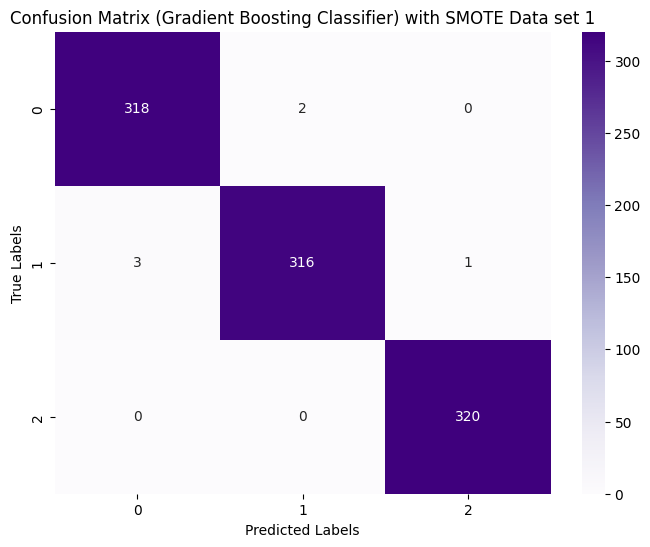

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the classifier
gb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print the evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Gradient Boosting Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Gradient Boosting): 0.9964349376114082
Precision (Gradient Boosting): 0.9966532475165036
Recall (Gradient Boosting): 0.9964349376114082
F1-score (Gradient Boosting): 0.9965023536843166
Confusion Matrix (Gradient Boosting):
[[  79    2    0]
 [   3 1596    1]
 [   0    0    2]]


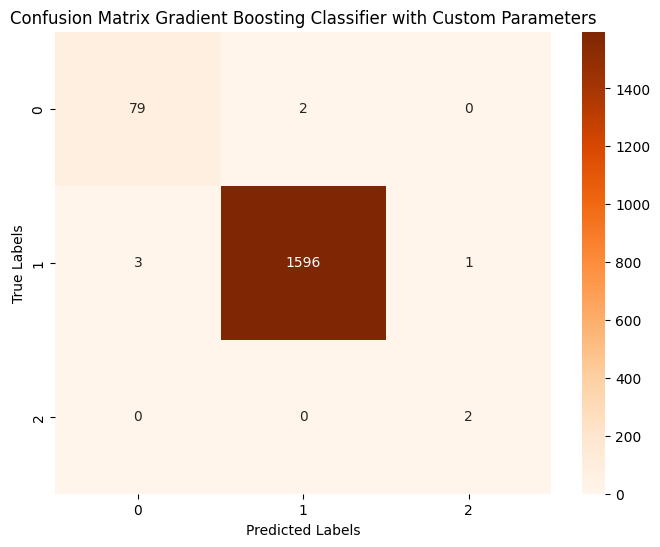

In [ ]:

# Predict on training data
y_pred_train_gb = gb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_train_valid, y_pred_train_gb)
precision_gb = precision_score(y_train_valid, y_pred_train_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb = recall_score(y_train_valid, y_pred_train_gb, average='weighted')
f1_gb = f1_score(y_train_valid, y_pred_train_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_train_valid, y_pred_train_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting): {accuracy_gb}")
print(f"Precision (Gradient Boosting): {precision_gb}")
print(f"Recall (Gradient Boosting): {recall_gb}")
print(f"F1-score (Gradient Boosting): {f1_gb}")
print(f"Confusion Matrix (Gradient Boosting):\n{conf_matrix_gb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier with Custom Parameters")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (Gradient Boosting Test): 0.9079229122055674
Precision (Gradient Boosting Test): 0.878484702089575
Recall (Gradient Boosting Test): 0.9079229122055674
F1-score (Gradient Boosting Test): 0.886462184707179
Confusion Matrix (Gradient Boosting Test):
[[  9  30   0]
 [  7 415   0]
 [  0   6   0]]


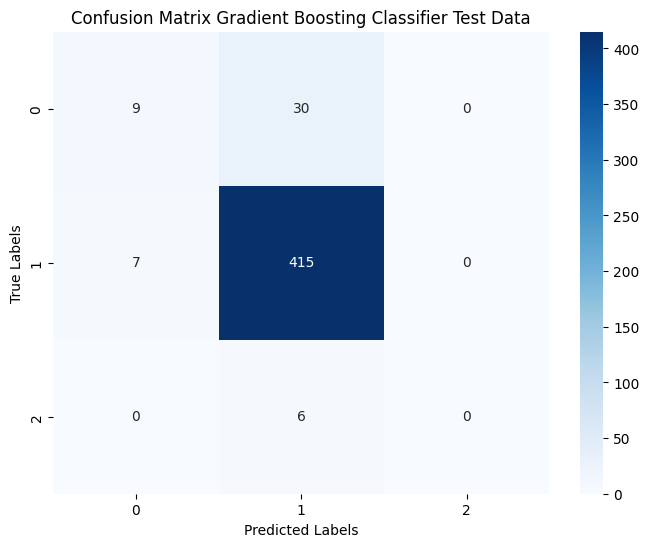

In [ ]:
y_pred_test_gb = gb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_gb_test = accuracy_score(y_test_valid, y_pred_test_gb)
precision_gb_test = precision_score(y_test_valid, y_pred_test_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb_test = recall_score(y_test_valid, y_pred_test_gb, average='weighted')
f1_gb_test = f1_score(y_test_valid, y_pred_test_gb, average='weighted')
conf_matrix_gb_test = confusion_matrix(y_test_valid, y_pred_test_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting Test): {accuracy_gb_test}")
print(f"Precision (Gradient Boosting Test): {precision_gb_test}")
print(f"Recall (Gradient Boosting Test): {recall_gb_test}")
print(f"F1-score (Gradient Boosting Test): {f1_gb_test}")
print(f"Confusion Matrix (Gradient Boosting Test):\n{conf_matrix_gb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier Test Data")
plt.show()

In [ ]:
 y_pred_test_gb

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
final_merged_GB_set2=final_merged_EXTRA_TREES_set2.copy()

In [ ]:
final_merged_GB_set2=final_merged_GB_set2.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_GB_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_gb_df = pd.DataFrame({
    'y_pred_test_gb': y_pred_test_gb  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_GB_set2 = final_merged_GB_set2.reset_index(drop=True)
y_pred_test_gb_df=y_pred_test_gb_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_GB_set2 = pd.concat([final_merged_GB_set2, y_pred_test_gb_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_GB_set2.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_gb  
0            Mild to Moderate           1               1  
1                           -           1               1  
2                           0           1               1  
3                        Mild           0               0  
4                           -           1               1  


In [ ]:
final_merged_GB_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels,y_pred_test_gb
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1,1
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1,1


In [ ]:
final_merged_GB_set2.to_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/final_merged_GB_musculoskeletal_set2.csv', index=False)


# RANDOM FOREST

In [ ]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
labels=pd.read_csv('/content/drive/MyDrive/MUSCULOSKELETAL HEALTH/new_labels_musculoskeletal_set2.csv')

In [ ]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [ ]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
scaler=StandardScaler()
smote=SMOTE()
test_split=0.2

In [ ]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
smote = SMOTE(k_neighbors=1) # Change k_neighbors to 1 or 2

X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [ ]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [ ]:
df_test=df_test.drop(columns=['Patient_ID','Muscular dystrophy, atrophy'])

In [ ]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


Random Forest Classifier Metrics:
Accuracy: 0.99375
Precision: 0.9938011147575142
Recall: 0.99375
F1-score: 0.9937497558498378
Confusion Matrix:
[[315   5   0]
 [  1 319   0]
 [  0   0 320]]


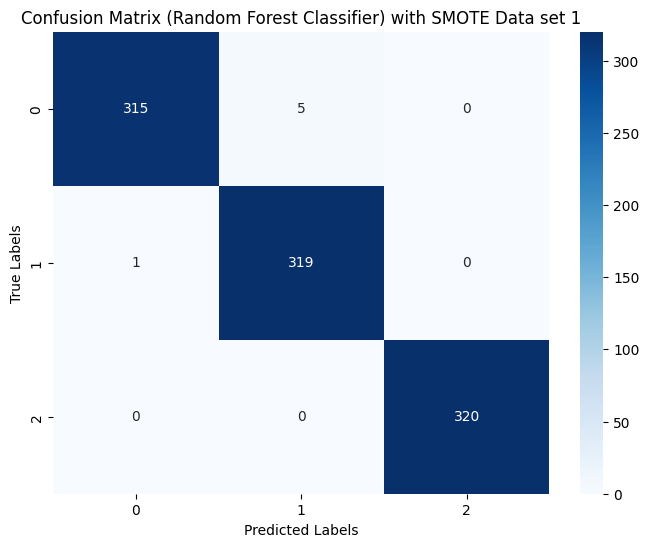

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Random Forest Classifier with specified parameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest Classifier) with SMOTE Data set 1")
plt.show()

Accuracy (rf): 0.9964349376114082
Precision (rf): 0.996411479961962
Recall (rf): 0.9964349376114082
F1-score (rf): 0.9963920356216657
Confusion Matrix (rf):
[[  76    5    0]
 [   1 1599    0]
 [   0    0    2]]


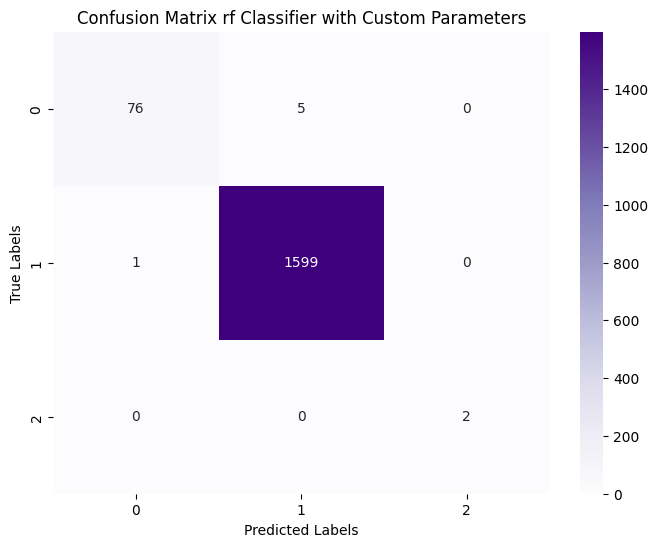

In [ ]:
y_pred_train_rf = rf_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_train_valid, y_pred_train_rf)
precision_rf = precision_score(y_train_valid, y_pred_train_rf, average='weighted')  # Use 'weighted' for multi-class
recall_rf = recall_score(y_train_valid, y_pred_train_rf, average='weighted')
f1_rf = f1_score(y_train_valid, y_pred_train_rf, average='weighted')
conf_matrix_rf= confusion_matrix(y_train_valid, y_pred_train_rf)

# Print metrics
print(f"Accuracy (rf): {accuracy_rf}")
print(f"Precision (rf): {precision_rf}")
print(f"Recall (rf): {recall_rf}")
print(f"F1-score (rf): {f1_rf}")
print(f"Confusion Matrix (rf):\n{conf_matrix_rf}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix rf Classifier with Custom Parameters")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy (rf Test): 0.9143468950749465
Precision (rf Test): 0.893619342391118
Recall (rf Test): 0.9143468950749465
F1-score (rf Test): 0.8869233015378626
Confusion Matrix (rf Test):
[[  7  32   0]
 [  2 420   0]
 [  0   6   0]]


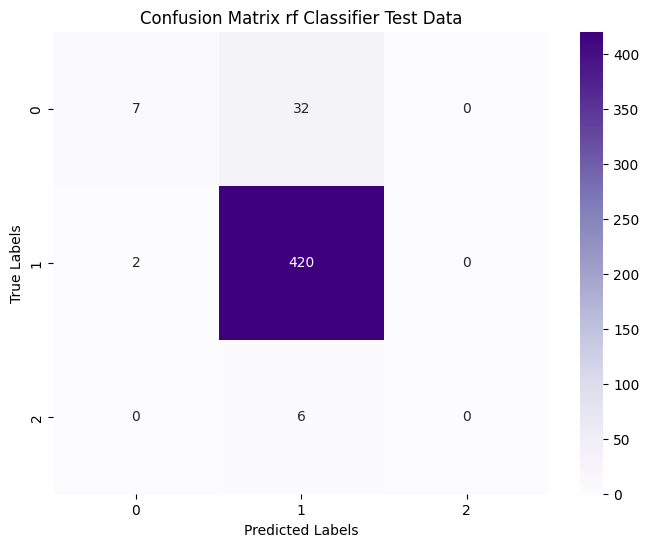

In [ ]:
# # Predict on test data
y_pred_test_rf = rf_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_rf_test = accuracy_score(y_test_valid, y_pred_test_rf)
precision_rf_test = precision_score(y_test_valid, y_pred_test_rf, average='weighted')  # Use 'weighted' for multi-class
recall_rf_test = recall_score(y_test_valid, y_pred_test_rf, average='weighted')
f1_rf_test = f1_score(y_test_valid, y_pred_test_rf, average='weighted')
conf_matrix_rf_test = confusion_matrix(y_test_valid, y_pred_test_rf)

# Print metrics
print(f"Accuracy (rf Test): {accuracy_rf_test}")
print(f"Precision (rf Test): {precision_rf_test}")
print(f"Recall (rf Test): {recall_rf_test}")
print(f"F1-score (rf Test): {f1_rf_test}")
print(f"Confusion Matrix (rf Test):\n{conf_matrix_rf_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix rf Classifier Test Data")
plt.show()


In [ ]:
y_pred_test_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
final_merged_RF_set2=final_merged_EXTRA_TREES_set2.copy()

In [ ]:
final_merged_RF_set2=final_merged_RF_set2.drop(columns=['predicted_labels_et'])

In [ ]:
final_merged_RF_set2

,Patient_ID,MYALGIAS/ MUSCLE ATROPHY,OSTEOARTHRITIS,OSTEOPOROSIS,"Muscular dystrophy, atrophy",new_labels
0,KHAIGHGPTTL318,5.401805e+08,6.080050e+08,9.792386e+08,Mild to Moderate,1
1,KHAIGHGPTTL319,4.279572e+08,9.211719e+04,1.154876e+09,-,1
2,KHAIGHGPTTL321,6.352002e+08,9.211719e+04,7.783474e+08,0,1
3,KHAIGHGPTTL348,5.776717e+08,2.428843e+08,1.076883e+09,Mild,0
4,KHAIGHGPTTL350,6.691975e+08,4.740202e+08,1.470514e+09,-,1
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,2.146963e+08,0.000000e+00,6.266213e+08,Moderate,1
463,KHSSRIGPTTL9,2.429180e+08,2.303350e+05,3.512164e+08,-,1
464,KHTENTGPTTL15,6.044759e+07,2.429764e+08,1.628411e+09,Moderate,1
465,KHTRCLGPTTL52,1.984048e+09,2.430838e+08,1.429600e+09,Moderate,1


In [ ]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_rf_df = pd.DataFrame({
    'y_pred_test_rf': y_pred_test_rf # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_RF_set2 = final_merged_RF_set2.reset_index(drop=True)
y_pred_test_rf_df=y_pred_test_rf_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_RF_set2 = pd.concat([final_merged_RF_set2, y_pred_test_rf_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_RF_set1.head())


       Patient_ID  MYALGIAS/ MUSCLE ATROPHY  OSTEOARTHRITIS  OSTEOPOROSIS  \
0  KHAIGHGPTTL318               540180531.8    6.080050e+08  9.792386e+08   
1  KHAIGHGPTTL319               427957212.1    9.211719e+04  1.154876e+09   
2  KHAIGHGPTTL321               635200228.3    9.211719e+04  7.783474e+08   
3  KHAIGHGPTTL348               577671732.7    2.428843e+08  1.076883e+09   
4  KHAIGHGPTTL350               669197497.6    4.740202e+08  1.470514e+09   

  Muscular dystrophy, atrophy  new_labels  y_pred_test_rf  
0            Mild to Moderate           1               1  
1                           -           1               1  
2                           0           1               1  
3                        Mild           0               1  
4                           -           1               1  
